In [1]:
import numpy as np
import tensorflow as tf
np.random.seed(42)
tf.random.set_seed(42)
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.datasets.fashion_mnist import load_data
import matplotlib.pyplot as plt

In [2]:
m=keras.models.load_model('best-cnn-model.h5')

In [3]:
m.layers

In [5]:
conv=m.layers[0]
conv.weights[0].shape,conv.weights[1].shape #1.입력된것 2. 가중치           #뉴런들의 모양가 커널들

(TensorShape([3, 3, 1, 32]), TensorShape([32]))

In [7]:
w=conv.weights[0].numpy() #수치값의 가중치 리스트 한개당 요소한개값 총 32개의 데이터
w.mean(),w.std()


(-0.024985813, 0.25137103)

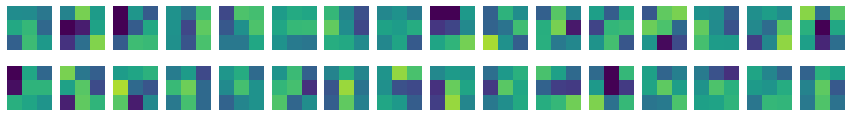

In [10]:
fig,axs = plt.subplots(2,16,figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i,j].imshow(w[:,:,0,i*16+j],vmin=-0.5,vmax=0.5)
        axs[i,j].axis('off')

In [14]:
n_m=keras.Sequential()#모델객체생성
n_m.add(keras.layers.Conv2D(32,kernel_size=3,activation='relu',padding='same',input_shape=(28,28,1)))#레이어층 생성,패팅 똑같은 사이즈로 만들어줨

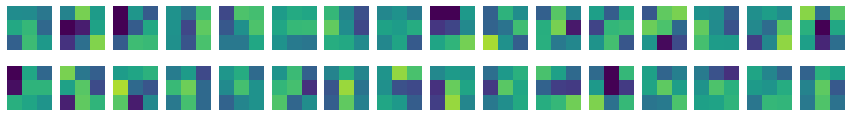

In [15]:
n_conv=n_m.layers[0]
n_w=n_conv.weights[0].numpy()
fig,axs= plt.subplots(2,16,figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i,j].imshow(w[:,:,0,i*16+j],vmin=-0.5,vmax=0.5)
        axs[i,j].axis('off')

(array([31., 24., 32., 33., 29., 25., 36., 24., 25., 29.]),
 array([-0.14193562, -0.1136645 , -0.08539338, -0.05712227, -0.02885115,
        -0.00058004,  0.02769108,  0.0559622 ,  0.08423331,  0.11250443,
         0.14077555], dtype=float32),
 <BarContainer object of 10 artists>)

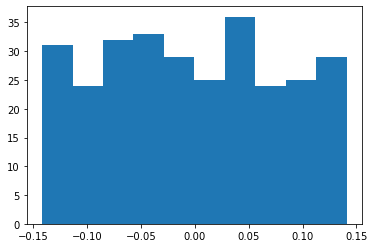

In [17]:
plt.hist(n_w.reshape(-1,1))

In [18]:
m.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv2d_input')>

In [20]:
cov_act1=keras.Model(m.input,m.layers[0].output)#하나의 레이어층이 끝나는 모델 구조
(x_data,y_data),(t_x_data,t_y_data) = keras.datasets.fashion_mnist.load_data()
in_data=x_data.reshape(-1,28,28,1)/255.0

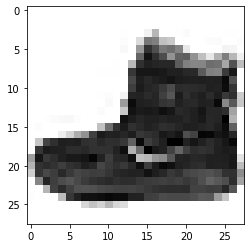

In [21]:
plt.imshow(x_data[0],cmap='gray_r')

In [24]:
f_map=cov_act1.predict(in_data[0:1])
f_map.shape

(1, 28, 28, 32)

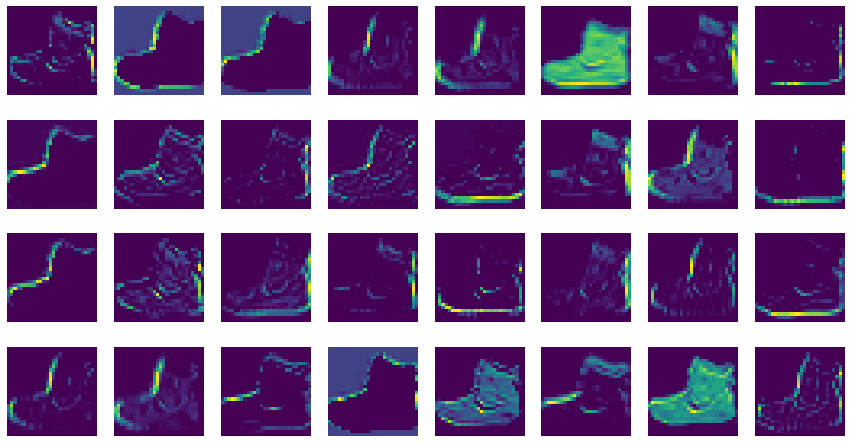

In [28]:
fig,axs = plt.subplots(4,8,figsize=(15,8))
for i in range(4):
    for j in range(8):
        axs[i,j].imshow(f_map[0,:,:,i*8+j])
        axs[i,j].axis('off')

In [30]:
cov_act2=keras.Model(m.input,m.layers[2].output)#하나의 레이어층이 끝나는 모델 구조
f2_map=cov_act2.predict(in_data[0:1])
f2_map.shape

(1, 14, 14, 64)

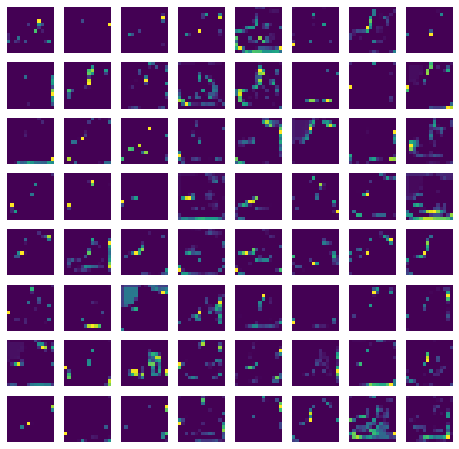

In [32]:
fig,axs = plt.subplots(8,8,figsize=(8,8))
for i in range(8):
    for j in range(8):
        axs[i,j].imshow(f2_map[0,:,:,i*8+j])
        axs[i,j].axis('off')